In [76]:
%matplotlib inline
import requests
from bs4 import BeautifulSoup
import os
import pandas as pd
import time
import re
import seaborn
from lxml import html
import matplotlib.pyplot as plt
import numpy as nmp

%config InlineBackend.figure_format = 'svg'
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5


In [77]:
url = 'http://www.imdb.com/chart/top'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')

In [78]:
movies = soup.select('td.titleColumn')
links = [a.attrs.get('href') for a in soup.select('td.titleColumn a')]
crew = [a.attrs.get('title') for a in soup.select('td.titleColumn a')]
ratings = [b.attrs.get('data-value') for b in soup.select('td.posterColumn span[name=ir]')]

In [79]:
data_frame = {
    "movies": movies,
    "ratings": ratings,
    "crew": crew,
    "links": links
}

data = pd.DataFrame(data_frame)
data

,movies,ratings,crew,links
0,"[\n 1.\n , [The Shawshank Redemption...",9.235333014250921,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/
1,"[\n 2.\n , [The Godfather], \n, [(19...",9.15613616599304,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/
2,"[\n 3.\n , [The Dark Knight], \n, [(...",8.989789916531285,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/
3,"[\n 4.\n , [The Godfather Part II], ...",8.984102484017756,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/
4,"[\n 5.\n , [12 Angry Men], \n, [(195...",8.951319687627189,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/
...,...,...,...,...
245,"[\n 246.\n , [The Iron Giant], \n, [...",8.005517867170871,"Brad Bird (dir.), Eli Marienthal, Harry Connic...",/title/tt0129167/
246,"[\n 247.\n , [Aladdin], \n, [(1992)]...",8.004999380934063,"Ron Clements (dir.), Scott Weinger, Robin Will...",/title/tt0103639/
247,"[\n 248.\n , [The Help], \n, [(2011)...",8.004905605534722,"Tate Taylor (dir.), Viola Davis, Emma Stone",/title/tt1454029/
248,"[\n 249.\n , [Gandhi], \n, [(1982)],...",8.003962322104554,"Richard Attenborough (dir.), Ben Kingsley, Joh...",/title/tt0083987/


In [80]:
def process_text_mv(text):
    data = text.get_text().split("\n")
    return data[2].strip()

In [81]:
def process_text_year(text):
    data = text.get_text().split("\n")
    return data[3].strip()[1:-1]

In [82]:
data["title"] = data.movies.apply(process_text_mv)
data["year"] = data.movies.apply(process_text_year)

In [83]:
data.head()

,movies,ratings,crew,links,title,year
0,"[\n 1.\n , [The Shawshank Redemption...",9.235333014250921,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/,The Shawshank Redemption,1994
1,"[\n 2.\n , [The Godfather], \n, [(19...",9.15613616599304,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/,The Godfather,1972
2,"[\n 3.\n , [The Dark Knight], \n, [(...",8.989789916531285,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/,The Dark Knight,2008
3,"[\n 4.\n , [The Godfather Part II], ...",8.984102484017756,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/,The Godfather Part II,1974
4,"[\n 5.\n , [12 Angry Men], \n, [(195...",8.951319687627189,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/,12 Angry Men,1957


In [84]:
data.crew[5]

'Steven Spielberg (dir.), Liam Neeson, Ralph Fiennes'

In [85]:
def my_crew_liste(A): 
    A = A.split(',')
    out_data = [x.replace(r'(dir.)', '') for x in A]
    out_data = [x.strip() for x in out_data]
    return out_data

In [86]:
last_dir = data.copy(deep=True)
data['crew'] = data.crew.apply(my_crew_liste)
data

,movies,ratings,crew,links,title,year
0,"[\n 1.\n , [The Shawshank Redemption...",9.235333014250921,"[Frank Darabont, Tim Robbins, Morgan Freeman]",/title/tt0111161/,The Shawshank Redemption,1994
1,"[\n 2.\n , [The Godfather], \n, [(19...",9.15613616599304,"[Francis Ford Coppola, Marlon Brando, Al Pacino]",/title/tt0068646/,The Godfather,1972
2,"[\n 3.\n , [The Dark Knight], \n, [(...",8.989789916531285,"[Christopher Nolan, Christian Bale, Heath Ledger]",/title/tt0468569/,The Dark Knight,2008
3,"[\n 4.\n , [The Godfather Part II], ...",8.984102484017756,"[Francis Ford Coppola, Al Pacino, Robert De Niro]",/title/tt0071562/,The Godfather Part II,1974
4,"[\n 5.\n , [12 Angry Men], \n, [(195...",8.951319687627189,"[Sidney Lumet, Henry Fonda, Lee J. Cobb]",/title/tt0050083/,12 Angry Men,1957
...,...,...,...,...,...,...
245,"[\n 246.\n , [The Iron Giant], \n, [...",8.005517867170871,"[Brad Bird, Eli Marienthal, Harry Connick Jr.]",/title/tt0129167/,The Iron Giant,1999
246,"[\n 247.\n , [Aladdin], \n, [(1992)]...",8.004999380934063,"[Ron Clements, Scott Weinger, Robin Williams]",/title/tt0103639/,Aladdin,1992
247,"[\n 248.\n , [The Help], \n, [(2011)...",8.004905605534722,"[Tate Taylor, Viola Davis, Emma Stone]",/title/tt1454029/,The Help,2011
248,"[\n 249.\n , [Gandhi], \n, [(1982)],...",8.003962322104554,"[Richard Attenborough, Ben Kingsley, John Giel...",/title/tt0083987/,Gandhi,1982


In [87]:
#create a var crew_liste
crew_liste = [] 

for i in range(data.crew.shape[0]):
    crew_liste.extend(data.crew[i])

#create a var unique names 
unique_names = set(crew_liste)

print(f'все участники были: {len(crew_liste)}')

print(f'уникальные именые были: {len(unique_names)}')

все участники были: 750
уникальные именые были: 527


In [88]:
def info_direc(B):
    B = B.split(',')
    out_data = [x.strip() for x in B]
    for x in out_data:
        if r'(dir.)' in x:
            x = str(x.replace(r'(dir.)', ''))
            x = x.strip()
            return x

In [89]:
last_dir ['directors'] = last_dir.crew.apply(info_direc)
directors = set(last_dir['directors'])


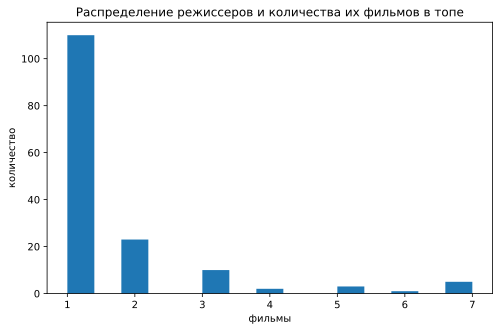

In [90]:
#2,3 visaulisation
number_dir = dict()
for director in list(directors):
    number_dir[director] = list(last_dir['directors'].values).count(director)
plt.hist(list(number_dir.values()), bins=15)
plt.title('Распределение режиссеров и количества их фильмов в топе')
plt.ylabel('количество')
plt.xlabel('фильмы')
plt.show()

In [91]:
#2.4 больше всего фильмов 
for key, value in number_dir.items():
    if value > 3:
        print(f'{key}: {value} фильмов')

Stanley Kubrick: 7 фильмов
Martin Scorsese: 7 фильмов
Quentin Tarantino: 5 фильмов
Akira Kurosawa: 7 фильмов
Charles Chaplin: 5 фильмов
Steven Spielberg: 7 фильмов
Sergio Leone: 4 фильмов
Hayao Miyazaki: 4 фильмов
Billy Wilder: 5 фильмов
Christopher Nolan: 7 фильмов
Alfred Hitchcock: 6 фильмов


In [104]:
#answer 
# Задача 3. Найти участника(ов) команд, у которого(ых) больше всего фильмов в топе. 
actors = set(unique_names) - set(directors)
list_of_all = []
for x in data.crew.values:
    list_of_all.extend(x)

actors_dict = {}
for actor in unique_names:
    actors_dict[actor] = list_of_all.count(actor)

In [107]:
sorted_actors = {k: v for k, v in sorted(actors_dict.items(), key=lambda item: item[1], reverse= True)}
for x in list(sorted_actors)[:10]:
    print(f'{x} в {sorted_actors[x]} фильмах из топа')

Charles Chaplin в 10 фильмах из топа
Robert De Niro в 9 фильмах из топа
Clint Eastwood в 8 фильмах из топа
Stanley Kubrick в 7 фильмах из топа
Martin Scorsese в 7 фильмах из топа
Christopher Nolan в 7 фильмах из топа
Akira Kurosawa в 7 фильмах из топа
Steven Spielberg в 7 фильмах из топа
Harrison Ford в 6 фильмах из топа
Tom Hanks в 6 фильмах из топа


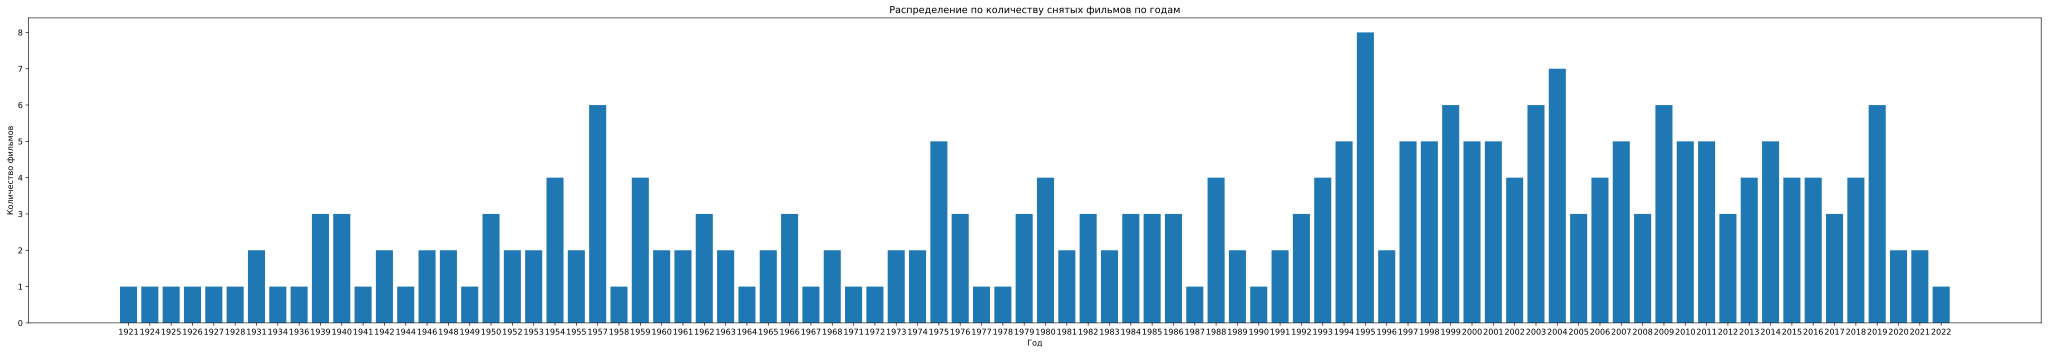

In [150]:
# answer 4 
def current_year(dtf): 
  year_A = sorted(list(set(dtf)))
  my_year = {}
  for year in year_A:
    my_year[year] = 0
    for date in dtf:
      if date == year:
        my_year[year] += 1

  plt.figure(figsize=(45, 7))
  plt.bar(range(len(my_year)), list(my_year.values()), tick_label=list(my_year.keys()))
  plt.title('Распределение по количеству снятых фильмов по годам')
  plt.ylabel('Количество фильмов')
  plt.xlabel('Год')
  plt.show()

current_year(data.year)

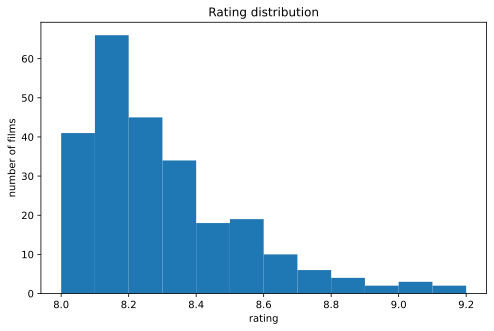

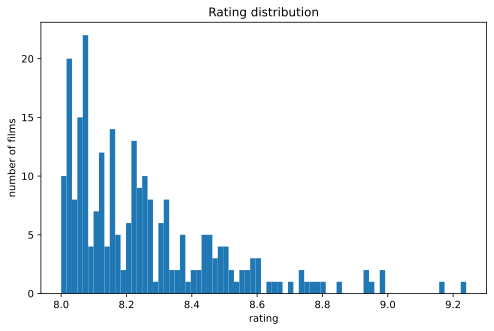

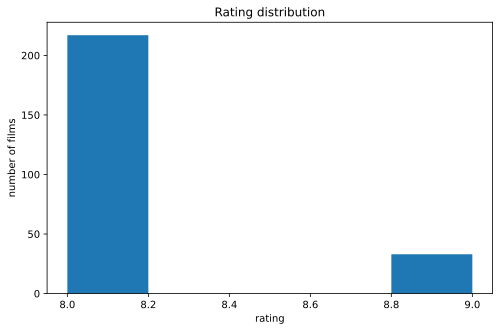

In [166]:
# answer 5.1 
#Округлить до сотых и отрисовать

figure1 = data.ratings.values.astype(float).round(1)
num_bin = len(set(figure1))
plt.hist(list(figure1), bins = num_bin)
plt.title('Rating distribution')
plt.xlabel('rating')
plt.ylabel('number of films')
plt.show()

# answer 5.2

#Округлить до десятых и отрисовать
figure2 = data.ratings.values.astype(float).round(2)
num_bin = len(set(figure2))
plt.hist(list(figure2), bins = num_bin)
plt.title('Rating distribution')
plt.xlabel('rating')
plt.ylabel('number of films')
plt.show()



# answer 5.3 
# Округлить до целых и отрисовать
figure3 = data.ratings.values.astype(float).round(0)
plt.hist(list(figure3), bins = 5)
plt.title('Rating distribution')
plt.xlabel('rating')
plt.ylabel('number of films')
plt.show()

In [172]:
#6 answer Задача 6. Используйте ссылку http://www.imdb.com/ и динамически добавляя ссылку на фильм из колонки links соберите описание фильмов. Пример поиска необходимого текст представлен ниже. Добавьте эту информацию в исходный датафрейм.
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}

def find_des (link):
    base_url = "https://www.imdb.com"
    film_url = base_url + link
    resultat = requests.get(film_url, headers=headers)
    html_text = resultat.text
    soup = BeautifulSoup(html_text, 'lxml')
    describe = soup.find_all(attrs={"name": "description"})[0].get("content")
    return describe

In [173]:
data['plot'] = data.links.apply(find_des)
data['plot']

0      The Shawshank Redemption: Directed by Frank Da...
1      The Godfather: Directed by Francis Ford Coppol...
2      The Dark Knight: Directed by Christopher Nolan...
3      The Godfather Part II: Directed by Francis For...
4      12 Angry Men: Directed by Sidney Lumet. With M...
                             ...                        
245    The Iron Giant: Directed by Brad Bird. With Je...
246    Aladdin: Directed by Ron Clements, John Musker...
247    The Help: Directed by Tate Taylor. With Emma S...
248    Gandhi: Directed by Richard Attenborough. With...
249    Rififi: Directed by Jules Dassin. With Jean Se...
Name: plot, Length: 250, dtype: object

In [179]:
# answer 7
#Задача 7. С помощью регулярных выражений найдите в текстах описания фильмов имена актеров, если это возможно (то есть - они там упоминаются).
 # Добавьте эту информацию в датафрейм и посчитайте, для скольких фильмов получилось это сдлеать. Подсказка: 
 # перечисление актеров иногда начинается с with.

def actors_list(description):
    return description.lower().split('with')[1].split('.')[0].strip()
data['actors_des'] = data['plot'].apply(actors_list)
print(data['actors_des']) 

0      tim robbins, morgan freeman, bob gunton, willi...
1        marlon brando, al pacino, james caan, richard s
2      christian bale, heath ledger, aaron eckhart, m...
3      al pacino, robert duvall, diane keaton, robert...
4                     martin balsam, john fiedler, lee j
                             ...                        
245                   jennifer aniston, harry connick jr
246    scott weinger, robin williams, linda larkin, j...
247    emma stone, viola davis, bryce dallas howard, ...
248    ben kingsley, rohini hattangadi, roshan seth, ...
249    jean servais, carl möhner, robert manuel, jani...
Name: actors_des, Length: 250, dtype: object


In [183]:
#answer 8 

best_url='http://www.imdb.com/chart/top/'

headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
out_data = requests.get(best_url, headers=headers)

bs = BeautifulSoup(out_data.text,"lxml")

infoss = bs.find_all(attrs={'class': 'ratingColumn imdbRating'})
user_ratings = []
i=0
while i<len(infoss):
    start = str(infoss[i]).find('based on') + 9
    end = str(infoss[i]).find('user ratings', start)-1    
    user_rating=str(infoss[i])[start:end].replace(',','')
    user_ratings.append(user_rating)
    i+=1

user_ratings = [int(item) for item in user_ratings]

data = data.assign(user_ratings=pd.Series(user_ratings))

sorted_data = data.sort_values(by='user_ratings', ascending=False)
sorted_data=sorted_data[["title","user_ratings"]]
sorted_data.head(10)


,title,user_ratings
0,The Shawshank Redemption,2676059
2,The Dark Knight,2649327
13,Inception,2348795
11,Fight Club,2121603
10,Forrest Gump,2075802
7,Pulp Fiction,2051449
15,The Matrix,1911243
8,The Lord of the Rings: The Fellowship of the Ring,1873489
1,The Godfather,1854989
6,The Lord of the Rings: The Return of the King,1844172


In [190]:
#answer 10
tags = []
base_url = 'http://www.imdb.com/'

link = data["links"].to_list()

i = 0
while i < 3:
    movie_url = base_url + link[i][1:]

    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
    result = requests.get(movie_url, headers=headers)

    bs = BeautifulSoup(result.text,"lxml")
    
    temp = bs.find_all(attrs = {"type": "application/ld+json"})

    start = str(temp).find('genre') + 7
    end = str(temp).find('datePublished', start)-2   
    genre = str(temp)[start:end].replace('[', '').replace(']', '')
    genre = re.sub('"', '', genre)
    tags.append(genre)
      
    i += 1
#print(tags)
data = data.assign(tags = pd.Series(tags))
data.head()

,movies,ratings,crew,links,title,year,plot,actors_description,actors_des,user_ratings,tags
0,"[\n 1.\n , [The Shawshank Redemption...",9.235333014250921,"[Frank Darabont, Tim Robbins, Morgan Freeman]",/title/tt0111161/,The Shawshank Redemption,1994,The Shawshank Redemption: Directed by Frank Da...,"tim robbins, morgan freeman, bob gunton, willi...","tim robbins, morgan freeman, bob gunton, willi...",2676059,Drama
1,"[\n 2.\n , [The Godfather], \n, [(19...",9.15613616599304,"[Francis Ford Coppola, Marlon Brando, Al Pacino]",/title/tt0068646/,The Godfather,1972,The Godfather: Directed by Francis Ford Coppol...,"marlon brando, al pacino, james caan, richard s","marlon brando, al pacino, james caan, richard s",1854989,"Crime,Drama"
2,"[\n 3.\n , [The Dark Knight], \n, [(...",8.989789916531285,"[Christopher Nolan, Christian Bale, Heath Ledger]",/title/tt0468569/,The Dark Knight,2008,The Dark Knight: Directed by Christopher Nolan...,"christian bale, heath ledger, aaron eckhart, m...","christian bale, heath ledger, aaron eckhart, m...",2649327,"Action,Crime,Drama"
3,"[\n 4.\n , [The Godfather Part II], ...",8.984102484017756,"[Francis Ford Coppola, Al Pacino, Robert De Niro]",/title/tt0071562/,The Godfather Part II,1974,The Godfather Part II: Directed by Francis For...,"al pacino, robert duvall, diane keaton, robert...","al pacino, robert duvall, diane keaton, robert...",1269940,NaN
4,"[\n 5.\n , [12 Angry Men], \n, [(195...",8.951319687627189,"[Sidney Lumet, Henry Fonda, Lee J. Cobb]",/title/tt0050083/,12 Angry Men,1957,12 Angry Men: Directed by Sidney Lumet. With M...,"martin balsam, john fiedler, lee j","martin balsam, john fiedler, lee j",790536,NaN
